In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')

x = df.iloc[:, [3,4]].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Gaussian Mixture Models (GMM)**

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full')

clusters = gmm.fit_predict(x_scaled)

probabilities = gmm.predict_proba(x_scaled)

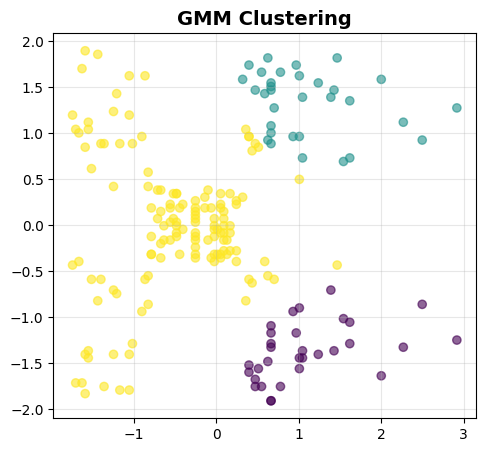

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('GMM Clustering', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

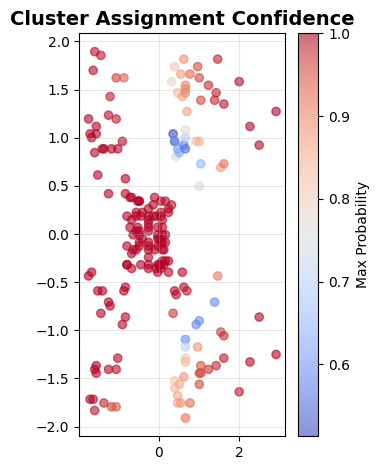

In [ ]:
# Show uncertainty (probability of belonging to cluster)
plt.subplot(1, 2, 2)
max_probs = np.max(probabilities, axis=1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=max_probs, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Max Probability')
plt.title('Cluster Assignment Confidence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- Model selection using AIC/BIC

In [7]:
n_components_range = range(1, 11)
aics = []
bics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(x_scaled)
    aics.append(gmm.aic(x_scaled))
    bics.append(gmm.bic(x_scaled))

optimal_n_aic = n_components_range[np.argmin(aics)]
optimal_n_bic = n_components_range[np.argmin(bics)]

print(f"Optimal components (AIC): {optimal_n_aic}")
print(f"Optimal components (BIC): {optimal_n_bic}")

Optimal components (AIC): 9
Optimal components (BIC): 5


**Spectral Clustering**

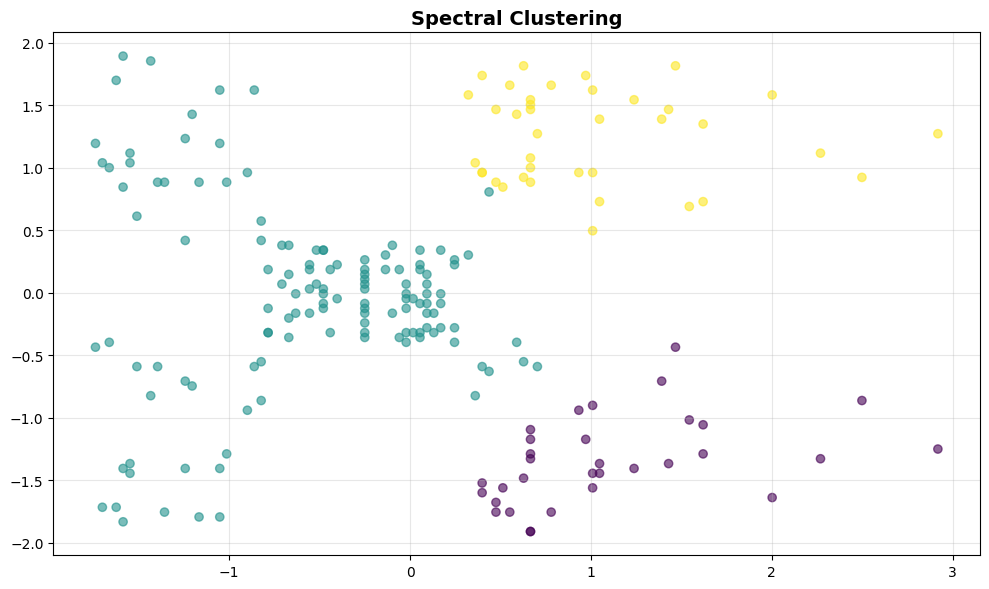

In [8]:
spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
clusters = spectral.fit_predict(x_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Spectral Clustering', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Mean Shift**

In [ ]:
meanshift = MeanShift(bandwidth=0.9)
clusters = meanshift.fit_predict(x_scaled)

n_clusters = len(np.unique(clusters))
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 5


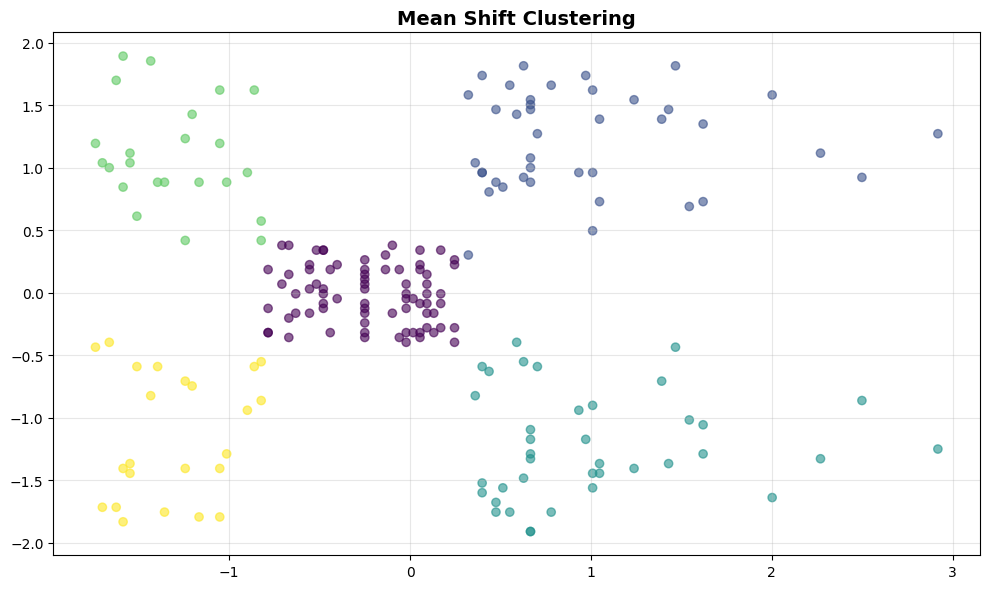

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Mean Shift Clustering', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Clustering Comparison**

In [19]:
clustering_methods = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3, random_state=42),
    'Spectral': SpectralClustering(n_clusters=3, random_state=42)
}
results = {}

for name, method in clustering_methods.items():
    if name == 'GMM':
        clusters = method.fit_predict(x_scaled)
    else:
        clusters = method.fit_predict(x_scaled)
    
    if len(set(clusters)) > 1:
        silhouette = silhouette_score(x_scaled, clusters)
        results[name] = {
            'Clusters' : clusters,
            'silhouette': silhouette,
            'n_clusters': len(set(clusters))
        }
        print(f"{name:15s}: Silhouette = {silhouette:.3f}, Clusters = {results[name]['n_clusters']}")

K-Means        : Silhouette = 0.467, Clusters = 3
Hierarchical   : Silhouette = 0.461, Clusters = 3
DBSCAN         : Silhouette = 0.350, Clusters = 3
GMM            : Silhouette = 0.430, Clusters = 3
Spectral       : Silhouette = 0.458, Clusters = 3
